# Numerical Exercise 1


## <font color='blue'>Exercise 01.1</font>

In this first exercise we want to test the goodness of the (pseudo)-random numbers generator (**prn's**) that we will use in our simulations. To do this, I face the following points:

### <font color='blue'>Point 1</font>
I calculate the simple integral

$$ \langle r \rangle = \int_0^1dr \ r = \frac{1}{2} $$

by sampling a random variable uniformly in $[0,1)$ for $ M=10^4 $ times. I use the **blocking method** to estimate the result and its uncertainty for this purpose. Let me therefore proceed as follows: I divide the total number of Monte Carlo steps $ M $ in $ N_{blk} $ blocks, with $ N_{blk} < M $; in each block $ k $ I generate $ n=\frac{M}{N_{blk}} $ random numbers uniformly distributed in $ [0, 1) $ (let me call them $ u_l $ with $ l=1,\dots,n $) using the prn's and estimate the value of the integral in that block as

$$ {\langle r \rangle}_{k} = \frac{1}{n} \sum_{l=1}^n u_l $$

Then, I easily calculate the square of this mean $ {\langle r \rangle}_{k}^2 $; at this point I obtain the progressive averages (i.e. the final estimates of the integral) using a certain number of blocks $ j $ with their uncertainties as


$$ {\langle r \rangle}_j = \frac{1}{j} \sum_{k=1}^j {\langle r \rangle}_k $$

$$ \sigma_j = \sqrt{\frac{ \frac{1}{j} \sum_{k=1}^j {\langle r \rangle}_k^2 - \left( \frac{1}{j}
   \sum_{k=1}^j{\langle r \rangle}_k \right)^2}{j-1}}
$$

with $ j = 1, \dots, N_{blk} $. Obviously I start with the estimation of uncertainties from the second block, because in the case of a single block the denominator in the previous formula for $ \sigma_j $ is zero. In this first case $ \sigma_1 = 0 $.<br>
In this exercise I use $ N_{blk} = 100 $.<br>
I finally plot $ {\langle r \rangle}_j - \dfrac{1}{2} $ as a function of the number of blocks used $ j $. <br>
For completeness, I made two simulations starting from two different seeds for the prn's, to verify that the results thus obtained are statistically compatible.

In [1]:
#Modules
from math import pi, sqrt
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()"> Show/Hide code cells </a>.''')

In [2]:
#In the case of single graphs in the figure
#I set the central alignment
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

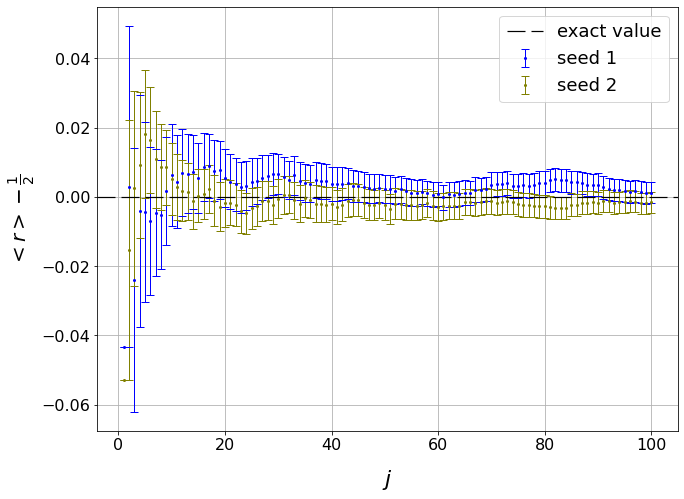

In [3]:
####################
#Point 1)
####################
#load the data
j, r1, err_r1=np.loadtxt("01.1/uniform.dat", usecols=(0,1,2), unpack=True)  #first seed
r2, err_r2=np.loadtxt("01.1/uniform_seed.dat", usecols=(1,2), unpack=True)  #second seed

#plots
plt.figure(figsize=[10.4, 7.8])  #deafult (6.4,4.8)
plt.xlabel('$j$', fontsize=22, labelpad=15)
plt.ylabel('$<r>-\\frac{1}{2}$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.errorbar(j, r1-1/2, yerr=err_r1, fmt='o', color='blue', 
             elinewidth=1., markersize=2, capsize=4, label='seed 1')
plt.errorbar(j, r2-1/2, yerr=err_r2, fmt='o', color='olive',
             elinewidth=1., markersize=2, capsize=4, label='seed 2')
plt.axhline(y=0, color='k', linewidth=1.2, linestyle='--', dashes=(15, 5), label='exact value')
plt.grid(True)
plt.legend(fontsize=18, loc='best')
plt.show()

As it can be seen from the graph, the result obtained by sampling a random variable with our prn's provides the correct estimate of the integral within a sigma, and the results obtained by changing the generator seed are statistically compatible.

### <font color='blue'>Point 2</font>
We repeat the same procedure in the calculation of the following integral:

$$ \sigma^2 = \int_0^1 dr \ \Big( r-\frac{1}{2} \Big)^2 = \frac{1}{12} $$

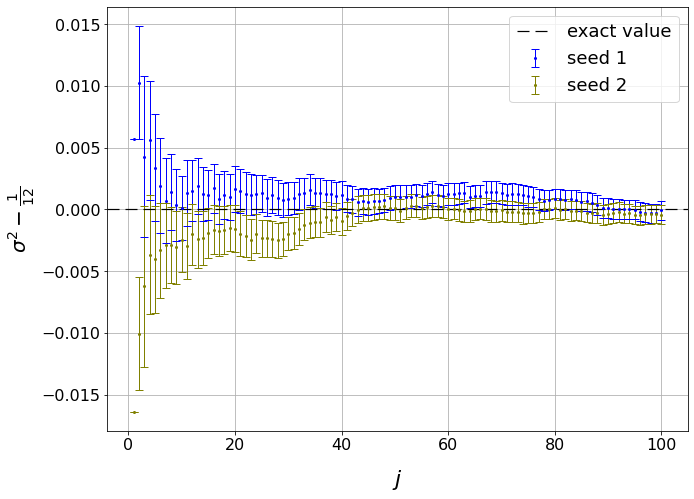

In [4]:
####################
#Point 2)
####################
#load the data
sigma1, err_s1=np.loadtxt("01.1/uniform.dat", usecols=(3, 4), unpack=True)  #first seed
sigma2, err_s2=np.loadtxt("01.1/uniform_seed.dat", usecols=(3, 4), unpack=True)  #second seed

#plots
plt.figure(figsize=[10.4, 7.8])  #deafult (6.4,4.8)
plt.xlabel('$j$', fontsize=22, labelpad=15)
plt.ylabel('$\sigma^2-\\frac{1}{12}$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.errorbar(j, sigma1-1/12, yerr=err_s1, fmt='o', color='blue',
             elinewidth=1., markersize=2, capsize=4, label='seed 1')
plt.errorbar(j, sigma2-1/12, yerr=err_s1, fmt='o', color='olive',
             elinewidth=1., markersize=2, capsize=4, label='seed 2')
plt.axhline(y=0, color='k', linewidth=1.2, linestyle='--', dashes=(10, 5), label='exact value')
plt.grid(True)
plt.legend(fontsize=18, loc='best')
plt.show()

As in the previous point, we can be satisfied with the result obtained through the random numbers generator.

### <font color='blue'>Point 3</font>
In this last point we want to verify that our prn's actually generates random numbers extracted from a uniform distribution. One way to achieve this is to performe the Pearson's cumulative $ \chi^2 $ test statistic.
Therefore I generate $ n=10^4 $ random numbers uniformly distributed in $ [0, 1) $; then I divide the domain of the distribution into $ M=100 $ sub-intervals of length $ \frac{1}{M}=10^{-2} $ and calculate the observed fraction $n_i$ of these random numbers within each sub-range; at this point I compute 

$$ \chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M} $$

and repeat this procedure 100 times; in each of these experiments we expect to have $ \chi^2 \sim 100 $ on average.

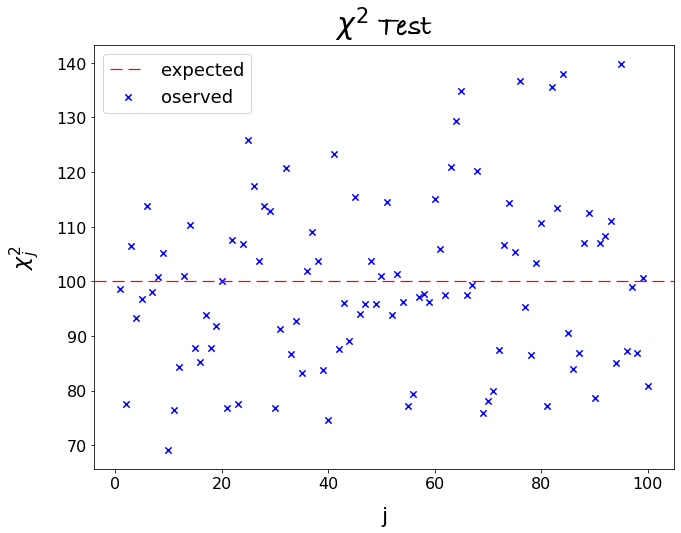

In [5]:
####################
#Point 3)
####################
#load the data
j, chi=np.loadtxt("01.1/chisquare.dat", usecols=(0, 1), unpack=True)

#plots
plt.figure(figsize=[10.4, 7.8])  #deafult (6.4,4.8)
plt.title('$\chi^2$ Test', fontname = 'Bradley Hand', fontsize=30)
plt.xlabel('j', fontsize=22, labelpad=15)
plt.ylabel('$\chi^2_j$', fontsize=22, labelpad=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.scatter(j, chi, color='b', marker='x', s=40, label='oserved')
plt.axhline(y=100, color='r', linewidth=1.2, linestyle='--', dashes=(10, 5), label='expected')
plt.legend(fontsize=18, loc='best')
plt.show()

We are not so satisfied seeing this graph, since many hypothesis tests are far from the expected value (<font color='red'>red dashed line</font>); however, this does not surprise us too much: the prn's generates **pseudo**-random numbers afterall!

# <font color='blue'>Exercise 01.2</font>
The purpose of this exercise is to check the **Central Limit Theorem (CLT)**, namely to verify that the sum (or the average value) of $ N $ statistically independent and identically distributed random variables $ {\big\{x_i\big\}}_{i=1}^{N} $ asymptotically obeys a Gaussian distribution, as long as the first two moments of the underlying distribution of the individual random variable exists. We also want to ascertain how the Gaussian pdf is an attractor (or fixed point) in the functional space of pdfs for all the pdfs that fulfill the requirements of the CLT, thus giving an idea of what the basin of attraction of the Gaussian distribution is. Finally, we want to show the presence of other attractors investigating the asymptotic distribution attained by the sum of random variables sampled from a generic Cauchy-Lorentz distribution.
<br>
To achieve the goal of this exercise I create four histograms filling them with $ 10^4 $ realizations of 

$$ S_N = \frac{1}{N} \sum_{i=1}^N x_i $$

$$ \text{with } N=1, 2, 10, 100 $$

in three different situations: being $ x_i $ a random variable uniformly distributed in $ [0, 1) $, sampled throwing an exponential dice with $ \lambda=1 $ and a Lorentzian dice with $ \mu=0 $ and $ \Gamma=1 $.
To do this, I added the prn's the ability to generate a random number sampled from a generic exponential distribution and a generic Lorentzian distribution, using the method of the inversion of the cumulative distribution in the following way:

- **Cauchy-Lorentz distribution** <br> I calculate the cumulative distribution function of a random variable
  $ x $ distributed as 
  
  $$ p(x) = \frac{1}{\pi} \frac{\Gamma^2}{(x-\mu)^2+\Gamma^2} $$
  
  obtaining 
  
  \begin{align} 
     F(x) & = \int_{-\infty}^x dx^\prime \frac{1}{\pi} \frac{\Gamma^2}{(x^\prime-\mu)^2+\Gamma^2} \\
          & = \frac{1}{\pi} \tan^{-1} \Big( \frac{x-\mu}{\Gamma} \Big) + \frac{1}{2} 
  \end{align}
  
  Then, by choosing $ y=F(x) $ uniformly distributed in $ [0, 1) $, I generate a random variable with the
  Lorentzian distribution inverting the cumulative function
  
  $$ x = \Gamma \tan \Big[ \pi\big(y-\frac{1}{2}\big) \Big] + \mu $$
  
- **Exponential distribution** <br> In this case $ x $ is distributed as 
  
  $$ p(x) = \lambda e^{-\lambda x} $$
  
  so
  
  $$ F(x) = \int_0^x dx^\prime \lambda e^{-\lambda x^\prime} = 1 - e^{-\lambda x} $$
  
  and like before I get
  
  $$ x = -\frac{1}{\lambda} \ln(1-y) $$

I show the three pictures below, one for each particular probability distribution: in each of them I plot the four histograms, one for each value of N, as described before.

In [6]:
###########################
#load the data
###########################
M=10**4  #Number of realizations
uniform=np.empty((4, M))  #Results for the Uniform dice
exponential=np.empty((4, M))  #Results for the Exponential dice
lorentzian=np.empty((4, M))  #Results for the Lorentzian dice
for j in range(4):
    uniform[j], exponential[j], lorentzian[j]=np.loadtxt("01.2/histo.dat", usecols=(0,1,2),
                                                         skiprows=j*(M+1), max_rows=M, unpack=True)

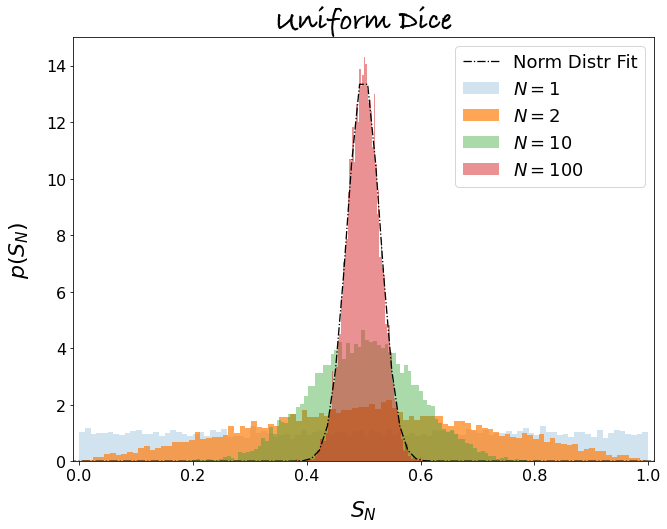

Uniform Dice Fit parameter:
<S_N> =  0.5000108001
Var{S_N} =  0.029037794697737294





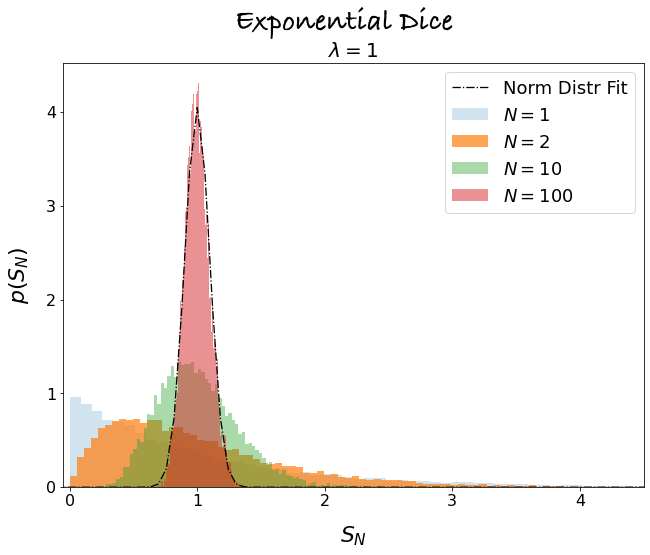

Exponential Dice Fit parameter:
<S_N> =  0.9998264965999999
Var{S_N} =  0.09851158906206817





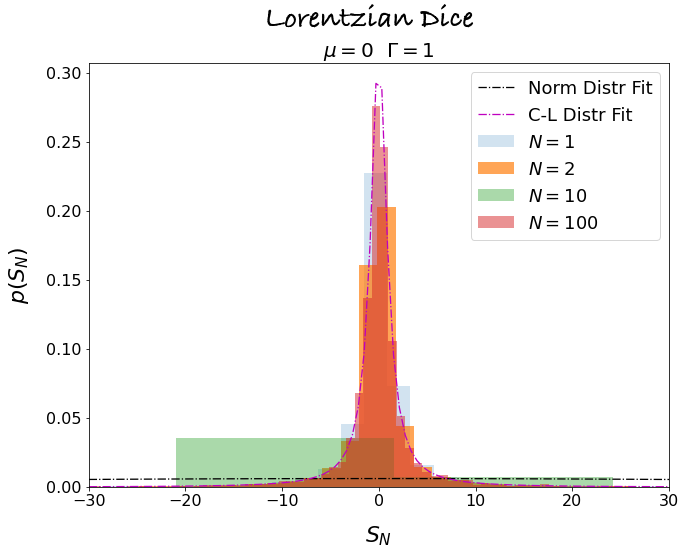

Lorentzian Dice Fit parameter:
<S_N> =  -0.010155445369008923
Gamma =  1.0041842049789673





In [7]:
###########################
#plots
###########################
###################################################################################################
#Uniform Distribution
plt.figure(figsize=[10.4, 7.8])  #deafult (6.4,4.8)
plt.title('Uniform Dice', fontname = 'Bradley Hand', fontsize=30)
plt.xlabel('$S_N$', fontsize=22, labelpad=15)
plt.ylabel('$p(S_N)$', fontsize=22, labelpad=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-0.01, 1.01)
plt.hist(uniform[0], bins=100, density=True, alpha=0.2, label='$N=1$')
plt.hist(uniform[1], bins=100, density=True, alpha=0.7, label='$N=2$')
plt.hist(uniform[2], bins=100, density=True, alpha=0.4, label='$N=10$')
plt.hist(uniform[3], bins=100, density=True, alpha=0.5, label='$N=100$')

#Normal Distribution Fit (N=100)
xt=plt.xticks()[0]
xmin, xmax=min(xt), max(xt)  #find minimum and maximum of xticks
lnspc=np.linspace(xmin, xmax, 100)
m, s=stats.norm.fit(uniform[3])  #get mean and standard deviation
pdf_g=stats.norm.pdf(lnspc, m, s)  #Theoretical Distribution
plt.plot(lnspc, pdf_g, color='black', linestyle='dashdot', lw=1.3, label='Norm Distr Fit')
plt.legend(fontsize=18, loc='best')
plt.show()
print("Uniform Dice Fit parameter:")
print('<S_N> = ', m)
print("Var{S_N} = ", s)
print('\n\n')
###################################################################################################


###################################################################################################
#Exponential Distribution
plt.figure(figsize=[10.4, 7.8])  #deafult (6.4,4.8)
plt.suptitle('Exponential Dice', fontname = 'Bradley Hand', fontsize=30)
plt.title('$\lambda = 1$', fontname = 'Bradley Hand', fontsize=20)
plt.xlabel('$S_N$', fontsize=22, labelpad=15)
plt.ylabel('$p(S_N)$', fontsize=22, labelpad=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-0.05, 4.5)
plt.hist(exponential[0], bins=100, density=True, alpha=0.2, label='$N=1$')
plt.hist(exponential[1], bins=100, density=True, alpha=0.7, label='$N=2$')
plt.hist(exponential[2], bins=100, density=True, alpha=0.4, label='$N=10$')
plt.hist(exponential[3], bins=100, density=True, alpha=0.5, label='$N=100$')

#Normal Distribution Fit (N=100)
xt=plt.xticks()[0]
xmin, xmax=min(xt), max(xt)  #find minimum and maximum of xticks
lnspc=np.linspace(xmin, xmax, 100)
m, s=stats.norm.fit(exponential[3])  #get mean and standard deviation
pdf_g=stats.norm.pdf(lnspc, m, s)  #Theoretical Distribution
plt.plot(lnspc, pdf_g, color='black', linestyle='dashdot', lw=1.3, label='Norm Distr Fit')
plt.legend(fontsize=18, loc='best')
plt.show()
print("Exponential Dice Fit parameter:")
print('<S_N> = ', m)
print("Var{S_N} = ", s)
print('\n\n')
###################################################################################################


###################################################################################################
#Cauchy-Lorentz Distribution
plt.figure(figsize=[10.4, 7.8])  #deafult (6.4,4.8)
plt.suptitle('Lorentzian Dice', fontname = 'Bradley Hand', fontsize=30)
plt.title('$\mu = 0 \\ \\ \Gamma = 1$', fontname = 'Bradley Hand', fontsize=20)
plt.xlabel('$S_N$', fontsize=22, labelpad=15)
plt.ylabel('$p(S_N)$', fontsize=22, labelpad=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-30, 30)
plt.hist(lorentzian[0], bins=8000, density=True, alpha=0.2, label='$N=1$')
plt.hist(lorentzian[1], bins=8000, density=True, alpha=0.7, label='$N=2$')
plt.hist(lorentzian[2], bins=8000, density=True, alpha=0.4, label='$N=10$')
plt.hist(lorentzian[3], bins=8000, density=True, alpha=0.5, label='$N=100$')

#Normal Distribution Fit (N=100)
xt=plt.xticks()[0]
xmin, xmax=min(xt), max(xt)  #find minimum and maximum of xticks
lnspc=np.linspace(xmin, xmax, 100)
m, s=stats.norm.fit(lorentzian[3])  #get mean and standard deviation
pdf_g=stats.norm.pdf(lnspc, m, s)  #Theoretical Distribution
plt.plot(lnspc, pdf_g, color='black', linestyle='dashdot', lw=1.3, label='Norm Distr Fit')

#Cauchy-Lorentz Fit (N=100)
xt=plt.xticks()[0]
xmin, xmax=min(xt), max(xt)  #find minimum and maximum of xticks
lnspc=np.linspace(xmin, xmax, 100)
mu, gamma=stats.cauchy.fit(lorentzian[3])  #get mean and standard deviation
pdf_l=stats.cauchy.pdf(lnspc, mu, gamma)  #Theoretical Distribution
plt.plot(lnspc, pdf_l, color='m', linestyle='dashdot', lw=1.3, label='C-L Distr Fit')

plt.legend(fontsize=18, loc='best')
plt.show()
print("Lorentzian Dice Fit parameter:")
print('<S_N> = ', mu)
print("Gamma = ", gamma)
print('\n\n')
###################################################################################################

From the figures just shown it is clear that the uniform and exponential distribution belong to the basin of attraction of the Normal distribution, satisfying the hypothesis of the CLT; indeed I can fit the case $ N=100 $ with a Gaussian pdf (black dashdot line).
Conversely, the Cauchy-Lorentz distribution has an infinite second moment and therefore it is necessary to go beyond the CLT: in fact this distribution belongs to the Levy or stable distribution, and admits another attractor, the Cauchy-Lorentz distribution itself, as can be seen from the fit in the case of the Lorentzian dice (<font color='magenta'>magenta dashdot line</font>). In this case we cannot fit with a Gaussian pdf (black dashdot line).
Finally, I note that the averages and variances extracted through the fits for the uniform and exponential dice correspond to the forecasts of the CLT, i.e.

$$ \langle S_N \rangle = \mu $$

$$ \sigma^{2}_{S_N} = \frac{\sigma^2}{N} $$

being $ \langle x_1 \rangle = \langle x_2 \rangle = \ldots = \langle x_N \rangle = \mu $ and $ \langle {x_1}^2\rangle-{\langle x_1 \rangle}^2 = \langle {x_2}^2\rangle-{\langle x_2 \rangle}^2 = \ldots = \langle {x_N}^2\rangle-{\langle x_N \rangle}^2 = \sigma^2 < \infty $.

# <font color='blue'>Exercise 01.3</font>
This exercise consists in simulating the Buffon's experiment. 

<img src="01.3/Buffon's Needle.png" width="500" align='center'>

To represent each random throw of the needle onto the horizontal plane I sample the distance $ D $ between the midpoint of the needle $ \textbf{M} $ and the top of a straight line uniformly in $ \big[0, \frac{d}{2}\big] $
and then an angle $ \theta $ between the needle and that straight line uniformly distributed in $ \big[0, \frac{\pi}{2}\big] $;
at this point I count the number of times $N_{hit}$ the needle intersects the straight line (<font color='blue'>blue needle</font>), relying on how many times the condition

$$ D \leq \frac{L}{2} \sin{\theta} $$

is met (note that the system is invariant under traslations) (look at the figure above).
To sample the angle $ \theta $ I use a simple rejection technique, generating two random cartesian coordinates uniformly in $ [0, 1) $ and obtaining from them the angle 

$$ \theta = \cos^{-1}{\Bigg( \frac{x}{\sqrt{x^2+y^2}} \Bigg)} $$

if $ x^2 + y^2 < 1 $, otherwise I reject the coordinates $ (x, y) $ and repeat their sampling.
<br>
Proceeding in this way I can estimate the value of $ \pi $ using the equation 

\begin{equation}
  \pi = \lim_{M\to\infty} \frac{2 L M}{N_{hit} d} \tag{$\star$}
  \label{eq:buffon}
\end{equation}

but without using $ \pi $ itself in this calculation.
The result of my simulation is shown below: I estimate the uncertainties with the blocking method, using $100$ blocks of length $100$, for a total of $M=10^4$ steps; finally I chose $ L=2.0 \ cm $ for the needle and $ d=2.5 \ cm $ for the distance between two straight lines (recalls that \eqref{eq:buffon} is valid for $ d > L $ but not $ d >> L $).

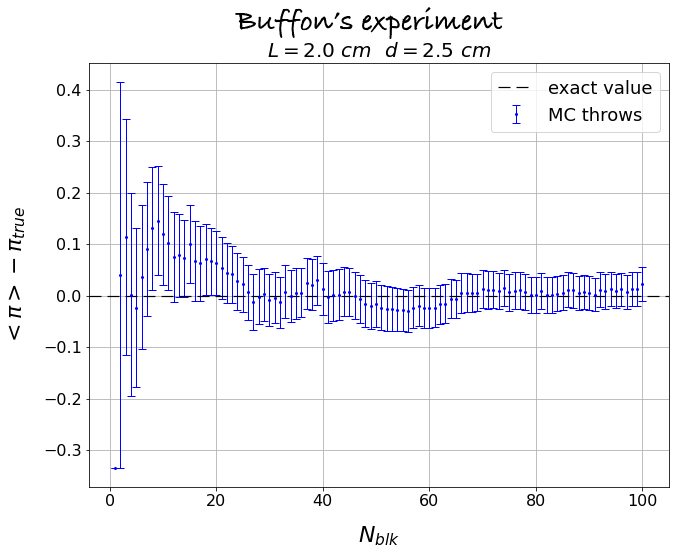

In [8]:
#load the data
N, Pi, err_Pi=np.loadtxt("01.3/Buffon.dat", usecols=(0,1,2), unpack=True)

#plots
plt.figure(figsize=[10.4, 7.8]) #deafult (6.4,4.8)
plt.suptitle('Buffon’s experiment', fontname = 'Bradley Hand', fontsize=30)
plt.title('$L=2.0 \\ cm \\ \\ d=2.5 \\ cm$', fontname = 'Bradley Hand', fontsize=20)
plt.xlabel('$N_{blk}$', fontsize=22, labelpad=15)
plt.ylabel('$<\pi> - \pi_{true}$', fontsize=22, labelpad=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.errorbar(N, Pi-pi, yerr=err_Pi, fmt='ob', elinewidth=1., markersize=2, capsize=4, label='MC throws')
plt.axhline(y=0, color='k', linewidth=1.2, linestyle='--', dashes=(10, 5), label='exact value')
plt.legend(fontsize=18, loc='best')
plt.grid(True)
plt.show()

The graph clearly shows how, simulating the random throw of the Buffon's needle, it is possible to estimate the value of $\pi$ very precisely, using relatively few Monte Carlo steps.